
# **IMAGENET - VGG16 - NESNE TANIMA**


---



**Colab** için kimlik doğrulama adımları:

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**Google Drive** içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:

In [2]:
import os 
os.chdir("/gdrive/My Drive/")

In [4]:
!ls

'2021-11-19 14-48-39.mkv'	  midterm
'BRİCK BREAKER'			 'Profil Resim.jpeg'
 data				  space
 download.jpeg			 'STAJ rAPOR.docx'
 Final_Game_Development		  Untitled
'First Blog Mockup.drawio'	 'Untitled (1)'
'Google Foto'			 'W13.zip (Unzipped Files)'
 image_2022-07-03_161700056.png   WorkPlace
 Metugeex


### Kütüphane Kurulumu

In [5]:
!pip3 install -q keras

**ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır.**

*On milyondan fazla etiketli resim bulunmaktadır.*

**ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız**


![alt text](https://github.com/hnarayanan/artistic-style-transfer/raw/05c95e5ac7001201d1ae9bf734a9224cf3445388/notebooks/images/imagenet-sample.jpg)



**Keras kütüphanesinden import edilmesi gerekenler: VGG16 eğitilmiş modeli**

In [6]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions


**Keras'ta önceden ImageNet veri kümesinde eğitilmiş  bir modeli yükleme **

In [7]:
model = VGG16(weights = 'imagenet', include_top=True)

553467096/553467096 [==============================] - 17s 0us/step


**Model yapısına bir göz atalım**: Hangi katmanlar var ve katmanların özellikleri neler...

In [8]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

**Toplam parametre sayısı da bize fikir verebilir** 

In [9]:
model.count_params()

138357544

**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**

In [10]:
import os
os.chdir("/gdrive/My Drive")

In [19]:
!ls

'2021-11-19 14-48-39.mkv'	  Metugeex
'BRİCK BREAKER'			  midterm
 cam_agacı.jpg			 'Profil Resim.jpeg'
 data				  space
 download.jpeg			 'STAJ rAPOR.docx'
 Final_Game_Development		  Untitled
'First Blog Mockup.drawio'	 'Untitled (1)'
'Google Foto'			 'W13.zip (Unzipped Files)'
 gül.jpg			  WorkPlace
 image_2022-07-03_161700056.png


**Bir test resmi yükleyelim ve ön işlemler yapalım**

*   f16
*   inek
*  Van kedisi
*  Olips 



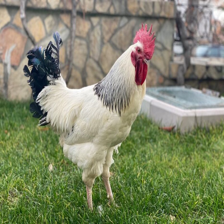

In [26]:
image_path = 'tavuk.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [27]:
x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

### **TEST GÖRÜNTÜSÜ İLE SINIFLAMA YAPMA**
<img align="left" width="200" height="200" src="https://cloud.githubusercontent.com/assets/532272/21507867/3376e9fe-cc4a-11e6-9350-7ec4f680da36.gif">



In [28]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 15ms/step
predicted: [('n01514668', 'cock', 0.8046563), ('n01514859', 'hen', 0.19471754), ('n01807496', 'partridge', 0.00012708252)]
cock
